# ICSS(PM) analysis for cohort02

**METADATA:**
 
|Sex    | ICSS+ShA | ICSS+LgA   |
|:-----:|:--------:|:----------:|
|Males  | F2, F8   | F6, F11    |
|-------|----------|------------|
|Females| F19      | F14        |
|-------|----------|------------|
 
**OUTLINE:**
1. Load data
2. Plot individual animals
    1. Pass 1-4
        1. Theta0
        2. M50
        3. MaxRate
    2. Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
3. Plot groups
    1. Scatter and line plots: Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
    2. Line plots: Mean +/- SEM of Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
---

In [1]:
%load_ext rpy2.ipython

In [2]:
%%capture
%%R
library(tidyverse)
library(lubridate)

---
## 1. Load data

In [3]:
%%capture
%%R
# 1.1. Collating all the files into one tibble
# loading data: set the path to 
ICSS_dataDir <- "~/Dropbox (Partners HealthCare)/Projects/R01_2017_OxycSA-NASh-Glutamate/_data_R01_2017/_data_R01_2017_ICSS/_ana_files/Cohort02/"
ICSS_data <- read_csv(file.path(ICSS_dataDir, "_icssData_pm_cohort02_raw_longform.csv"))
ICSS_normData <- read_csv(file.path(ICSS_dataDir, "_icssData_pm_cohort02_normalized_longform.csv"))

In [4]:
%%R
ICSS_data %>% print

# A tibble: 728 x 7
   Date       Subject Experiment  Pass    T0   M50 MaxRate
   <date>     <chr>   <chr>      <dbl> <dbl> <dbl>   <dbl>
 1 2019-03-04 F11     LgA-Male       1  7.21  52.5     173
 2 2019-03-04 F11     LgA-Male       2 56.1   85.6     158
 3 2019-03-04 F11     LgA-Male       3 73.4   91.4     136
 4 2019-03-04 F11     LgA-Male       4 75.3  101.      136
 5 2019-03-05 F11     LgA-Male       1 28.6   88.3     183
 6 2019-03-05 F11     LgA-Male       2 69.0   87.3     132
 7 2019-03-05 F11     LgA-Male       3 79     92.0     116
 8 2019-03-05 F11     LgA-Male       4 79     95.7     112
 9 2019-03-06 F11     LgA-Male       1 20.7   58.3     156
10 2019-03-06 F11     LgA-Male       2 47.1   89.3     165
# ... with 718 more rows


In [5]:
%%R
# 1.2. Assign data type to columns. 
# This needs to be defined after loading the dataset
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>

ICSS_data$Subject <- ICSS_data$Subject %>% as.factor
ICSS_data$Experiment <- ICSS_data$Experiment %>% as.factor
ICSS_data$Pass <- ICSS_data$Pass %>% as.factor
ICSS_data %>% print

# A tibble: 728 x 7
   Date       Subject Experiment Pass     T0   M50 MaxRate
   <date>     <fct>   <fct>      <fct> <dbl> <dbl>   <dbl>
 1 2019-03-04 F11     LgA-Male   1      7.21  52.5     173
 2 2019-03-04 F11     LgA-Male   2     56.1   85.6     158
 3 2019-03-04 F11     LgA-Male   3     73.4   91.4     136
 4 2019-03-04 F11     LgA-Male   4     75.3  101.      136
 5 2019-03-05 F11     LgA-Male   1     28.6   88.3     183
 6 2019-03-05 F11     LgA-Male   2     69.0   87.3     132
 7 2019-03-05 F11     LgA-Male   3     79     92.0     116
 8 2019-03-05 F11     LgA-Male   4     79     95.7     112
 9 2019-03-06 F11     LgA-Male   1     20.7   58.3     156
10 2019-03-06 F11     LgA-Male   2     47.1   89.3     165
# ... with 718 more rows


In [6]:
%%R
ICSS_normData %>% print

# A tibble: 546 x 7
   Date       Subject Experiment  Pass norm.T0 norm.M50 norm.MaxRate
   <date>     <chr>   <chr>      <dbl>   <dbl>    <dbl>        <dbl>
 1 2019-02-28 F2      ShA-Male       2    75.5     43.3         66.3
 2 2019-02-28 F2      ShA-Male       3   109.      62.4         95.5
 3 2019-02-28 F2      ShA-Male       4    98.0     56.2         86.1
 4 2019-03-01 F2      ShA-Male       2    76.3     43.7         67.0
 5 2019-03-01 F2      ShA-Male       3    64.9     37.2         57.0
 6 2019-03-01 F2      ShA-Male       4    73.0     41.9         64.1
 7 2019-03-04 F2      ShA-Male       2   104.      59.4         90.9
 8 2019-03-04 F2      ShA-Male       3   103.      59.3         90.9
 9 2019-03-04 F2      ShA-Male       4    79.0     45.3         69.4
10 2019-03-04 F6      LgA-Male       2   128.     101.          46.1
# ... with 536 more rows


In [7]:
%%R
# 1.2. Assign data type to columns. 
# This needs to be defined after loading the dataset
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>
 
ICSS_normData$Subject <- ICSS_normData$Subject %>% as.factor
ICSS_normData$Experiment <- ICSS_normData$Experiment %>% as.factor
ICSS_normData$Pass <- ICSS_normData$Pass %>% as.factor
ICSS_normData %>% print

# A tibble: 546 x 7
   Date       Subject Experiment Pass  norm.T0 norm.M50 norm.MaxRate
   <date>     <fct>   <fct>      <fct>   <dbl>    <dbl>        <dbl>
 1 2019-02-28 F2      ShA-Male   2        75.5     43.3         66.3
 2 2019-02-28 F2      ShA-Male   3       109.      62.4         95.5
 3 2019-02-28 F2      ShA-Male   4        98.0     56.2         86.1
 4 2019-03-01 F2      ShA-Male   2        76.3     43.7         67.0
 5 2019-03-01 F2      ShA-Male   3        64.9     37.2         57.0
 6 2019-03-01 F2      ShA-Male   4        73.0     41.9         64.1
 7 2019-03-04 F2      ShA-Male   2       104.      59.4         90.9
 8 2019-03-04 F2      ShA-Male   3       103.      59.3         90.9
 9 2019-03-04 F2      ShA-Male   4        79.0     45.3         69.4
10 2019-03-04 F6      LgA-Male   2       128.     101.          46.1
# ... with 536 more rows


---
## 2. Plot individual animals
### 2.1. Pass 1-4 

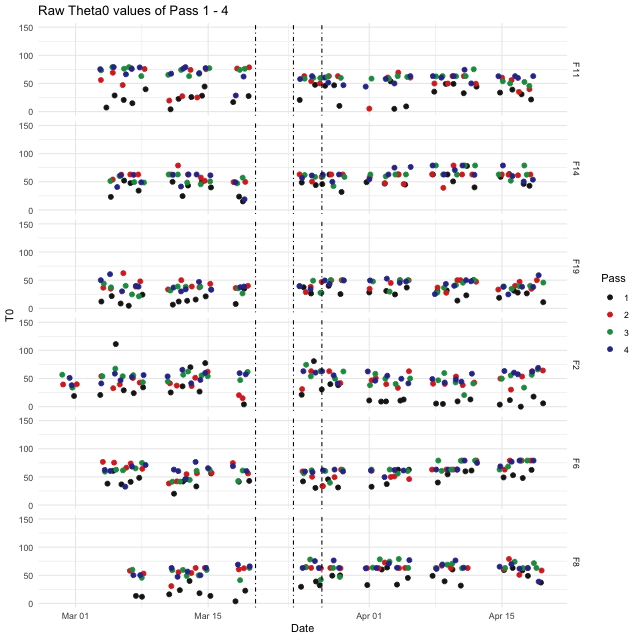

In [8]:
%%R -w 640 -h 640
# Plotting raw values for T0, Pass 1 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) + 
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype=4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 1 - 4") + theme_minimal()

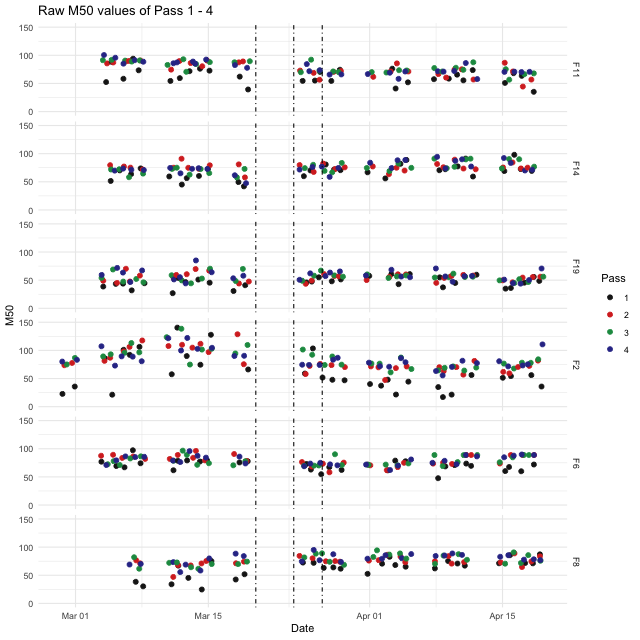

In [9]:
%%R -w 640 -h 640
# Plotting raw values for M50, Pass 1 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 1 - 4") + theme_minimal()

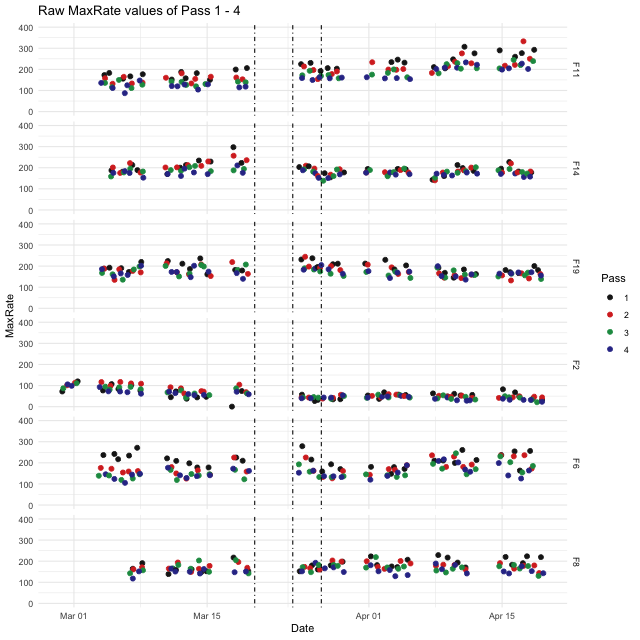

In [10]:
%%R -w 640 -h 640
# Plotting raw values for MaxRate, Pass 1 - 4
lower_limit = 0
upper_limit = 400
ICSS_data %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 1 - 4") + theme_minimal()

### 2.2. Pass 2-4 

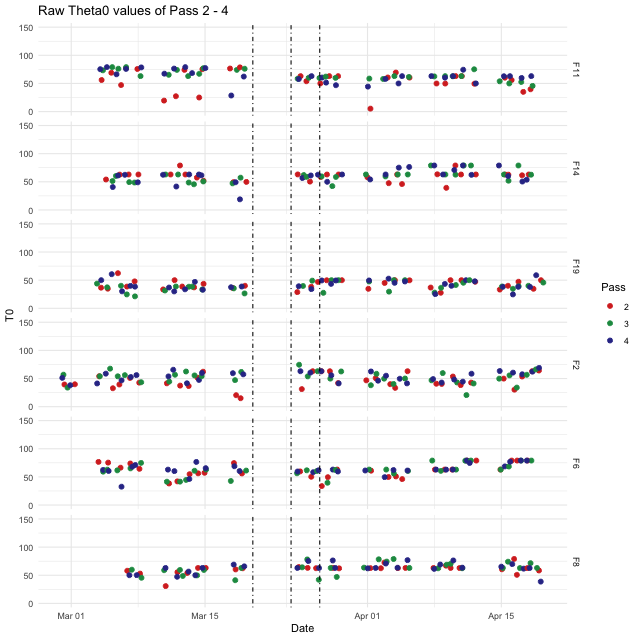

In [11]:
%%R -w 640 -h 640
# Plotting raw values for T0, Pass 2 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 2 - 4") + theme_minimal()

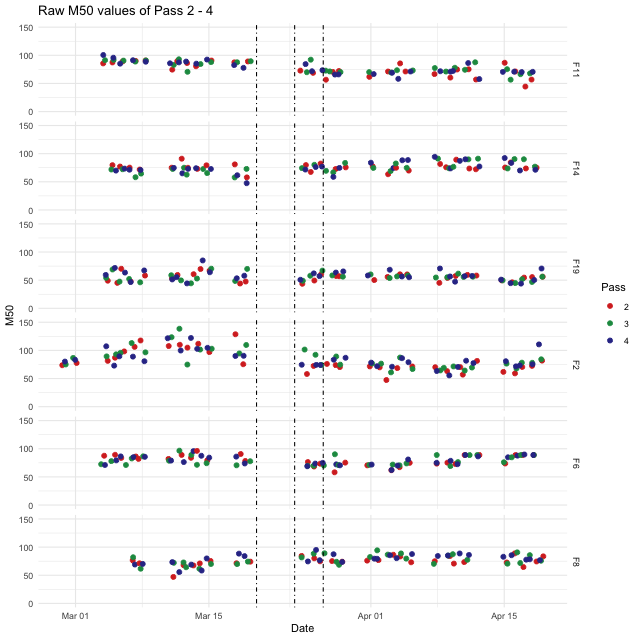

In [12]:
%%R -w 640 -h 640
# Plotting raw values for M50, Pass 2 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 2 - 4") + theme_minimal()

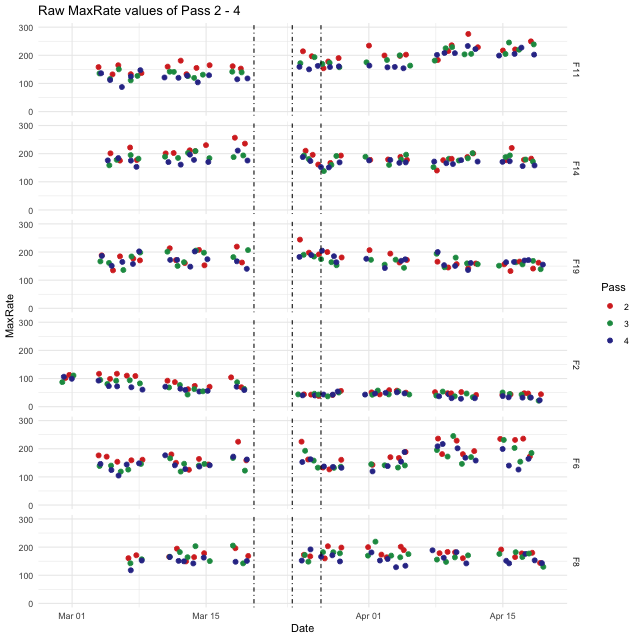

In [13]:
%%R -w 640 -h 640
# Plotting raw values for MaxRate, Pass 2 - 4
lower_limit = 0
upper_limit = 300
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 2 - 4") + theme_minimal()

---
## 3. Plot group-wise: percent baselines
### 3.1. Scatter and line plots

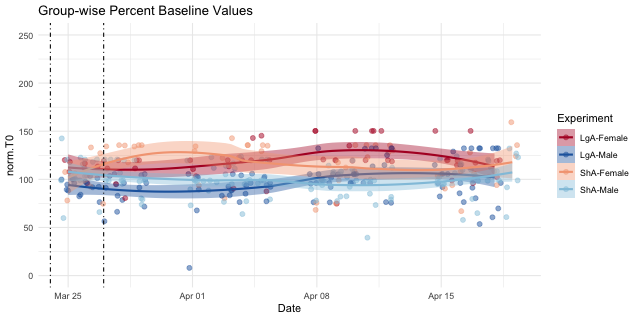

In [15]:
%%R -w 640 -h 320
# plotting all passes
ICSS_normData %>% filter(Date >= "2019-03-20") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.T0, color = Experiment, fill = Experiment)) + 
geom_jitter(alpha = 0.5, size = 2) + geom_smooth(method = 'loess') +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
scale_fill_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
ggtitle("Group-wise Percent Baseline Values") + 
theme_minimal()

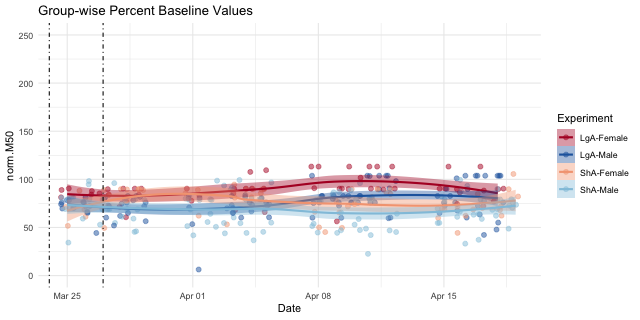

In [16]:
%%R -w 640 -h 320
# plotting all the passes
ICSS_normData %>% filter(Date >= "2019-03-20") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.M50, color = Experiment, fill = Experiment)) + 
geom_jitter(alpha = 0.5, size = 2) + geom_smooth(method = 'loess') + 
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
scale_fill_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
ggtitle("Group-wise Percent Baseline Values") + 
theme_minimal()

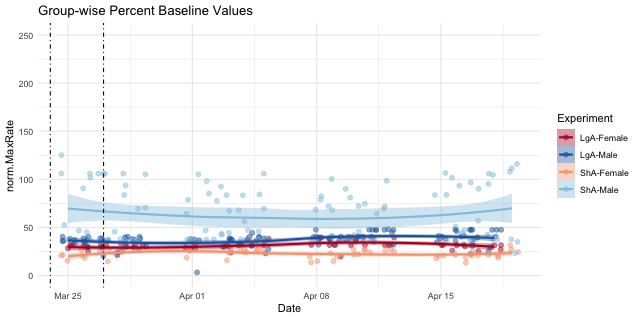

In [17]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% filter(Date >= "2019-03-20") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.MaxRate, color = Experiment, fill = Experiment)) + 
geom_jitter(alpha = 0.5, size = 2) + geom_smooth(method = 'loess') + 
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
scale_fill_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

### 3.2. Line plots: Mean +/- SEM of Pass 2-4

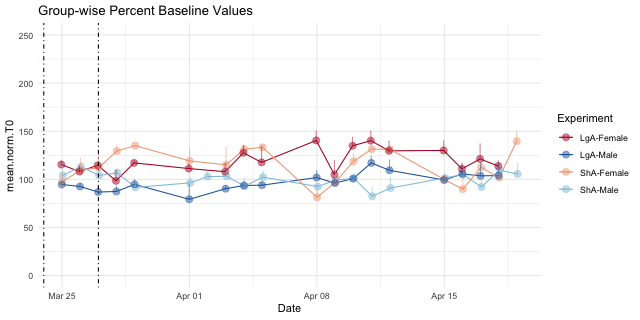

In [21]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2019-03-20") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.T0, color = Experiment)) + 
geom_line(position=position_dodge(0.1)) +
geom_point(size = 3, alpha = 0.5, position=position_dodge(0.1)) +
geom_errorbar(alpha = 0.5, aes(ymin=mean.norm.T0, ymax=mean.norm.T0+se.norm.T0), width=.1, position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2019-03-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-24")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-27")), linetype = 4) + 
ggtitle("Group-wise Percent Baseline Values") +
ylim(0, 250) + 
theme_minimal()

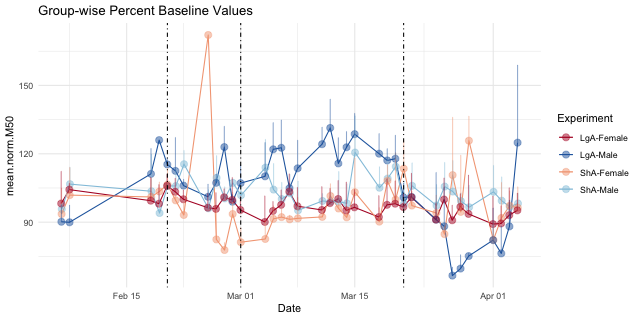

In [182]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2019-02-07") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.M50, color = Experiment)) + 
geom_line(position=position_dodge(0.1)) +
geom_point(size = 3, alpha = 0.5, position=position_dodge(0.1)) +
geom_errorbar(alpha = 0.5, aes(ymin=mean.norm.M50, ymax=mean.norm.M50+se.norm.M50), width=.1, position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2019-02-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-01")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-21")), linetype = 4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

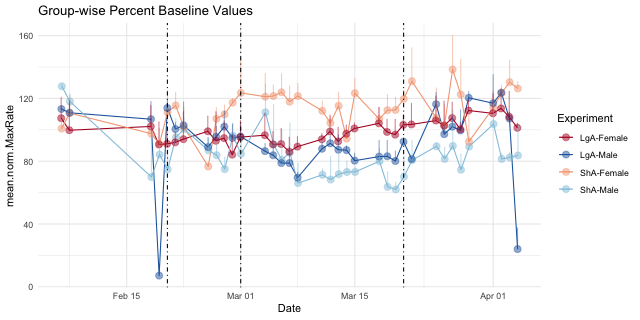

In [183]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2019-02-07") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.MaxRate, color = Experiment)) + 
geom_line(position=position_dodge(0.1)) +
geom_point(size = 3, alpha = 0.5, position=position_dodge(0.1)) +
geom_errorbar(alpha = 0.5, aes(ymin=mean.norm.MaxRate, ymax=mean.norm.MaxRate+se.norm.MaxRate), width=.1, position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2019-02-20")), linetype = 4) + 
geom_vline(xintercept = unclass(as.Date("2019-03-01")), linetype = 4) +
geom_vline(xintercept = unclass(as.Date("2019-03-21")), linetype = 4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()